In [1]:
HOME = "/home/localssk23/BraTS2025"

### Unzipping

In [2]:
# Unzip the data
# ? Time: 2 mins 35s.
# !unzip {HOME}/MICCAI-LH-BraTS2025-MET-Challenge-TrainingData.zip -d {HOME}/BraTS2025_TrainingData

### Num files sanity check

In [3]:
main_data_dir = f"{HOME}/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/UCSD - Training/"
print(f"Data directory: {main_data_dir}")

Data directory: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/UCSD - Training/


In [4]:
# %%sh

# ./sanity_file_num_check.sh 

### Checking number of classes in each

Data directory: /home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/UCSD - Training
BraTS-MET-01353-002: Unique values in 'seg.nii.gz' are: [0. 2. 4.]
BraTS-MET-01354-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-01354-001: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-01354-002: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-01356-000: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-01356-001: Unique values in 'seg.nii.gz' are: [0. 1. 2. 3.]
BraTS-MET-01285-001: Unique values in 'seg.nii.gz' are: [0. 2. 3.]
BraTS-MET-01285-003: Unique values in 'seg.nii.gz' are: [0. 3.]
BraTS-MET-01287-001: Unique values in 'seg.nii.gz' are: [0. 2. 4.]
BraTS-MET-01287-002: Unique values in 'seg.nii.gz' are: [0. 2. 3. 4.]
BraTS-MET-01288-000: Unique values in 'seg.nii.gz' are: [0. 2. 3.]
BraTS-MET-01288-002: Unique values in 'seg.nii.gz' are: [0. 3.]
BraTS-MET-01288-003: Unique values in 'seg.nii.gz' are: [0.

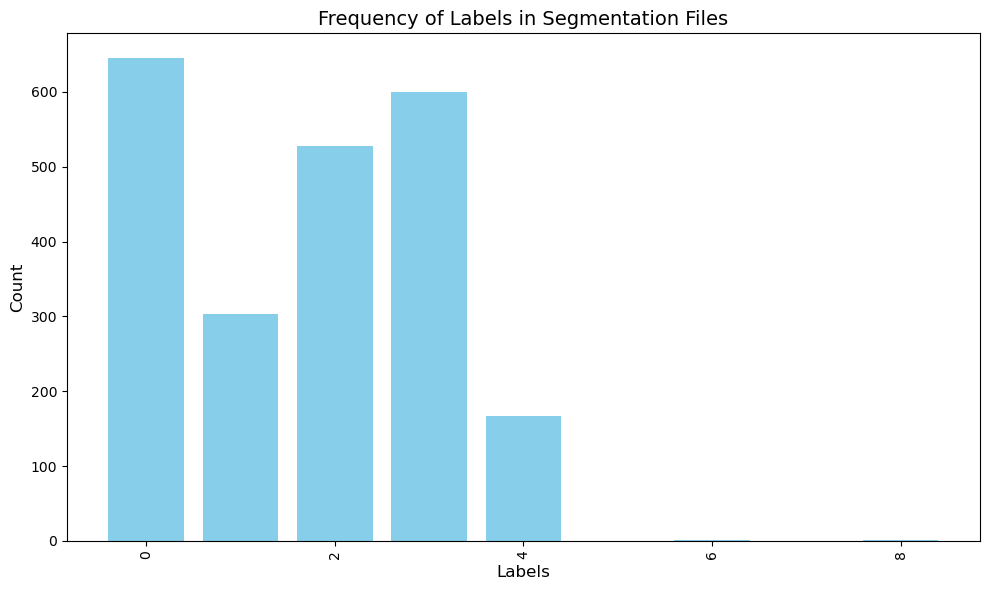

In [6]:
#? Time: 3m 50s

import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Path to the data directory
data_dir = "/home/localssk23/BraTS2025/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/UCSD - Training"
print(f"Data directory: {data_dir}")

# Initialize a Counter to tally the labels
label_counter = Counter()

# Iterate over each folder, excluding 'UCSD - Training'
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    
    # Skip the 'UCSD - Training' folder
    if folder_name == "UCSD - Training" or not os.path.isdir(folder_path):
        continue

    # Try to match the 'seg.nii.gz' file in the folder
    seg_file = None
    for file in os.listdir(folder_path):
        if file.endswith('seg.nii.gz'):
            seg_file = os.path.join(folder_path, file)
            break

    # Check if the 'seg.nii.gz' file exists in the folder
    if seg_file:
        # Load the segmentation file using nibabel
        seg_img = nib.load(seg_file)

        # Convert to a numpy array and find the unique values
        seg_data = seg_img.get_fdata()
        unique_values = np.unique(seg_data)

        # Update the label counter with the unique values
        label_counter.update(unique_values)

        print(f"{folder_name}: Unique values in 'seg.nii.gz' are: {unique_values}")
    else:
        print(f"❌ {folder_name}: 'seg.nii.gz' is missing.")

# Plotting the results
labels, counts = zip(*label_counter.items())  # Unzip the Counter into two lists

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Frequency of Labels in Segmentation Files', fontsize=14)
plt.xticks(rotation=90)  # Rotate labels on x-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()

### VIZ

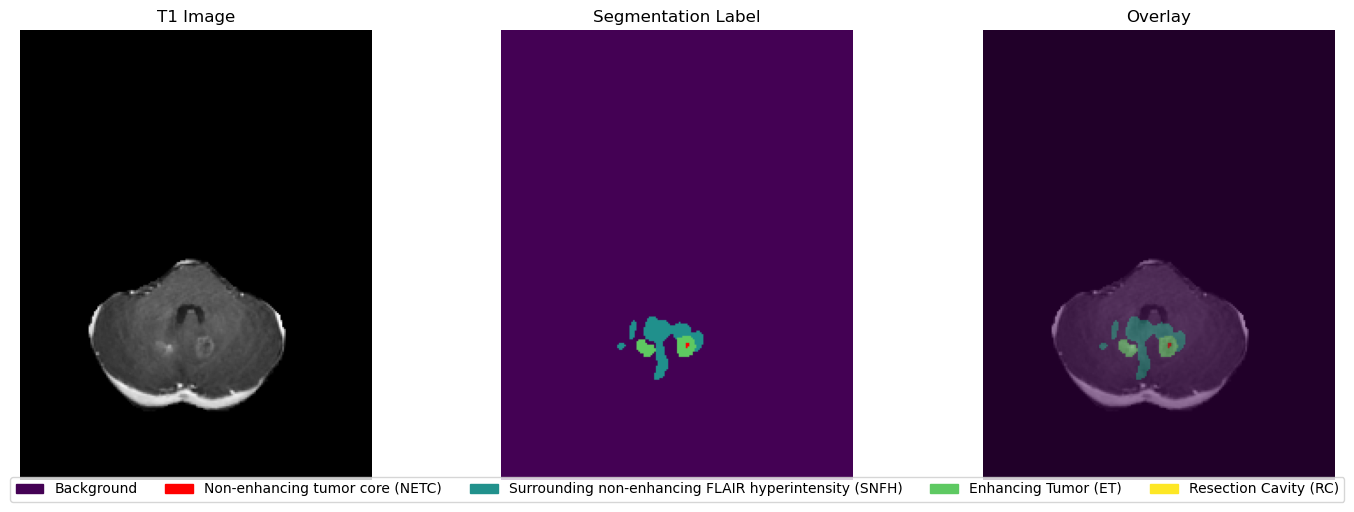

In [27]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Use HOME variable for consistent paths
HOME = "/home/localssk23/BraTS2025"
case = '01086'
label = f'{HOME}/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/UCSD - Training/BraTS-MET-{case}-002/BraTS-MET-{case}-002-seg.nii.gz'
t1c = f'{HOME}/BraTS2025_TrainingData/MICCAI-LH-BraTS2025-MET-Challenge-Training/UCSD - Training/BraTS-MET-{case}-002/BraTS-MET-{case}-002-t1c.nii.gz'
slice = 52
label_data = nib.load(label).get_fdata()
t1_data = nib.load(t1c).get_fdata()

# Legend is already defined in the notebooks
legend = {
    0: 'Background',
    1: 'Non-enhancing tumor core (NETC)',
    2: 'Surrounding non-enhancing FLAIR hyperintensity (SNFH)',
    3: 'Enhancing Tumor (ET)',
    4: 'Resection Cavity (RC)'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(np.rot90(t1_data[:, :, slice]), cmap='gray')
ax[0].set_title('T1 Image')
ax[0].axis('off')

# Create custom color map for segmentation label
seg_label_color = np.zeros((label_data.shape[0], label_data.shape[1], 4))
for i in range(5):  # Updated to handle 5 labels (0-4)
    if i == 1:
        color = [1, 0, 0, 1]  # Red for NETC
    else:
        color = cm.viridis(i / 4)  # Normalize by 4 to cover full range
    seg_label_color[label_data[:, :, slice] == i] = color

ax[1].imshow(np.rot90(seg_label_color))
ax[1].set_title('Segmentation Label')
ax[1].axis('off')

# Overlay
ax[2].imshow(np.rot90(t1_data[:, :, slice]), cmap='gray')
ax[2].imshow(np.rot90(seg_label_color), alpha=0.5)
ax[2].set_title('Overlay')
ax[2].axis('off')

# Add legend with all 5 labels
handles = [plt.Rectangle((0,0),1,1, color=cm.viridis(i/4)) for i in range(5)]
handles[1] = plt.Rectangle((0,0),1,1, color='red')  # Set NETC to red
fig.legend(handles, legend.values(), loc='upper center', ncol=5, bbox_to_anchor=(0.5, 0.05))

plt.tight_layout()
plt.show()


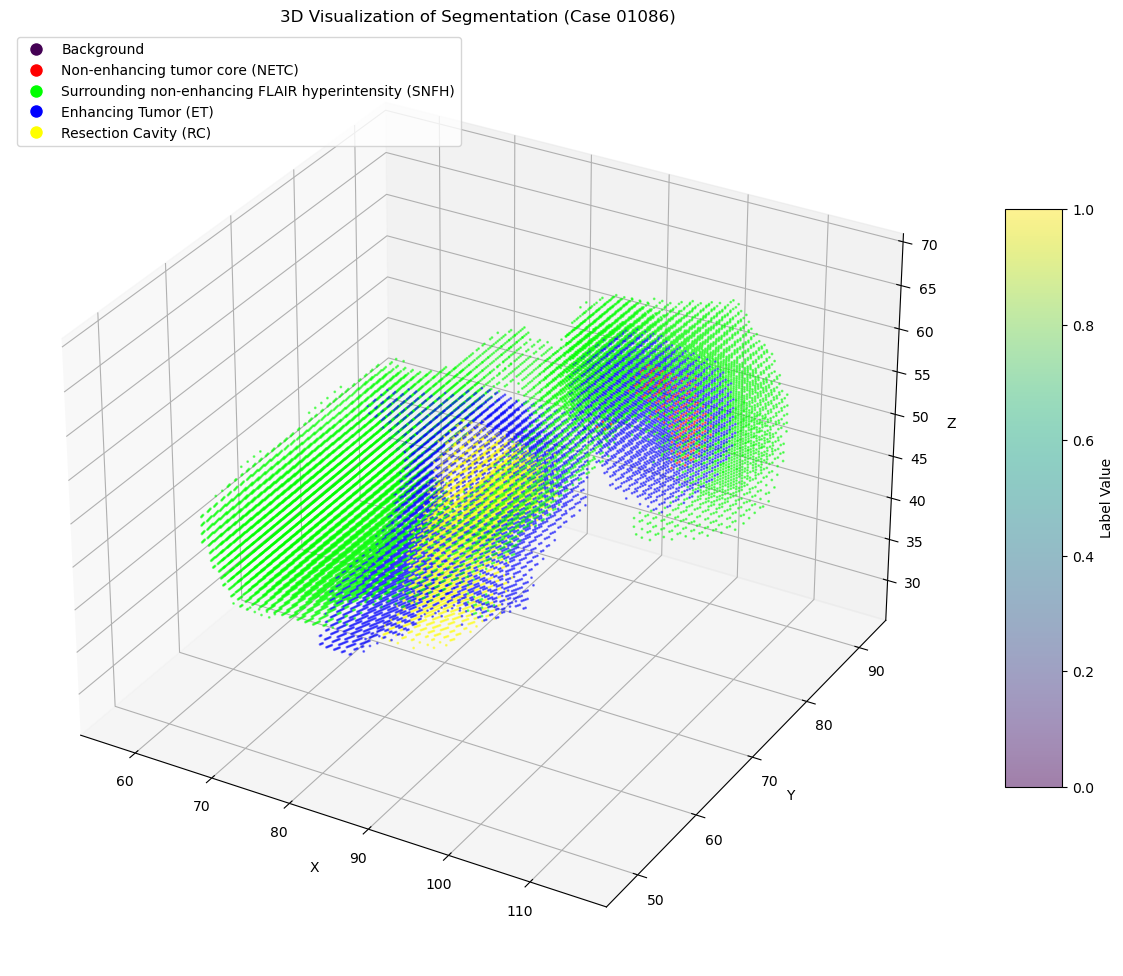

In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# Prepare data for 3D scatter plot
x, y, z = np.where(label_data > 0)  # Non-zero values in the segmentation volume
labels = label_data[x, y, z]  # The label values at the non-zero positions

# Create a custom color array for coloring points
# Expanded to handle 5 labels
def get_custom_colors(labels, max_label=5):
    colors = np.zeros((len(labels), 4))
    
    # Custom color mapping
    color_map = {
        1: [1, 0, 0, 1],     # Red for label 1
        2: [0, 1, 0, 1],     # Green for label 2
        3: [0, 0, 1, 1],     # Blue for label 3
        4: [1, 1, 0, 1],     # Yellow for label 4
        5: [1, 0, 1, 1]      # Magenta for label 5
    }
    
    for label, color in color_map.items():
        mask = labels == label
        colors[mask] = color
    
    # Fallback to viridis for any undefined labels
    undefined_mask = np.all(colors == 0, axis=1)
    colors[undefined_mask] = cm.viridis(labels[undefined_mask] / max_label)
    
    return colors

# Get custom colors
colors = get_custom_colors(labels)

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot with customized colors
scatter = ax.scatter(x, y, z, c=colors, marker='o', alpha=0.5, s=1)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a colorbar to show the label values
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Label Value')

# Title for better understanding
ax.set_title(f"3D Visualization of Segmentation (Case {case})")

# Create legend handles using Line2D
legend_handles = []
for label, name in legend.items():
    if label in [1, 2, 3, 4, 5]:
        # Use the same color mapping as in get_custom_colors()
        color_map = {
            1: [1, 0, 0, 1],     # Red
            2: [0, 1, 0, 1],     # Green
            3: [0, 0, 1, 1],     # Blue
            4: [1, 1, 0, 1],     # Yellow
            5: [1, 0, 1, 1]      # Magenta
        }
        color = color_map.get(label, cm.viridis(label / 5))
    else:
        color = cm.viridis(label / 5)
    
    handle = Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name)
    legend_handles.append(handle)

# Add the legend
ax.legend(handles=legend_handles, loc='upper left', fontsize=10)

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()